In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("F:/Python/Projects/Exchange rate")

In [3]:
df = pd.read_csv("exchange_rate3.csv")
df = df.iloc[::-1].reset_index(drop=True)

In [4]:
df

,date,price,open,high,low
0,2023-01-02,36.9000,36.9170,36.9171,36.745
1,2023-01-03,36.5686,36.7450,36.9171,36.745
2,2023-01-04,36.5686,36.7450,36.7522,36.745
3,2023-01-05,36.5686,36.7450,36.7514,36.745
4,2023-01-06,36.5600,36.7522,36.7522,36.745
...,...,...,...,...,...
110,2023-06-05,36.9100,36.9221,36.9342,36.745
111,2023-06-06,36.9290,36.7450,36.9345,36.745
112,2023-06-07,36.8550,36.7450,36.9366,36.745
113,2023-06-08,36.9100,36.9272,36.9366,36.745


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    115 non-null    object 
 1   price   115 non-null    float64
 2   open    115 non-null    float64
 3   high    115 non-null    float64
 4   low     115 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [6]:
df.describe()

,price,open,high,low
count,115.000000,115.000000,115.000000,115.000000
mean,36.812080,36.835872,36.912510,36.742713
std,0.158824,0.091132,0.057982,0.013323
min,36.560000,36.745000,36.745000,36.620000
25%,36.568600,36.745000,36.931600,36.745000
50%,36.910000,36.752200,36.934000,36.745000
75%,36.929500,36.931500,36.934500,36.745000
max,36.934200,36.932200,36.936600,36.745000


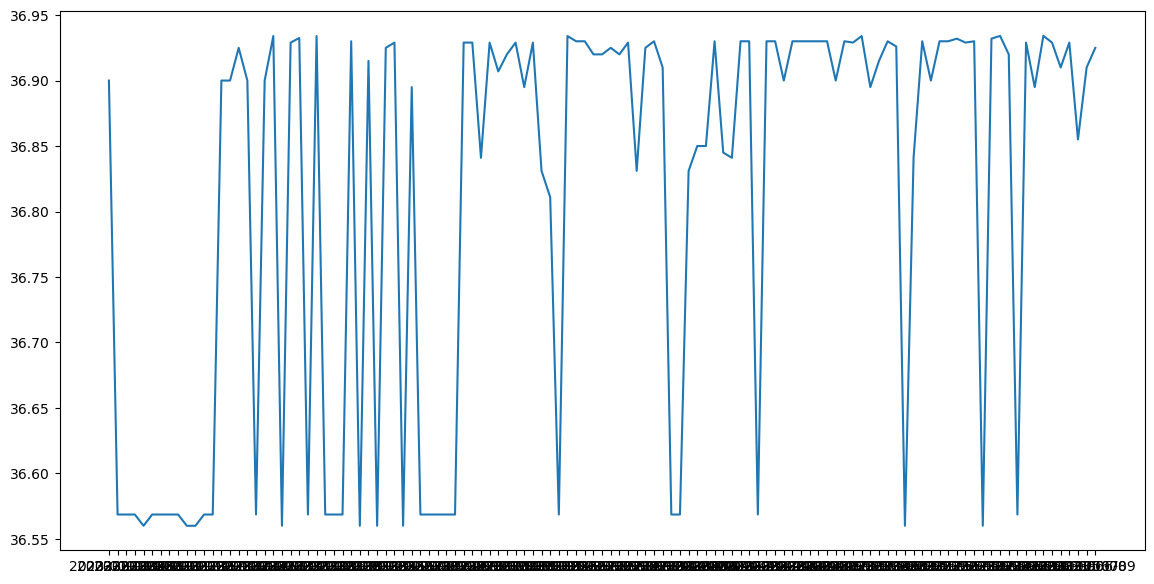

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df["date"], df["price"])
plt.show()

In [8]:
df["pricelog"] = np.log(df["price"])
df["date"] = pd.to_datetime(df["date"])
df.index = df["date"]
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek

<AxesSubplot:xlabel='month'>

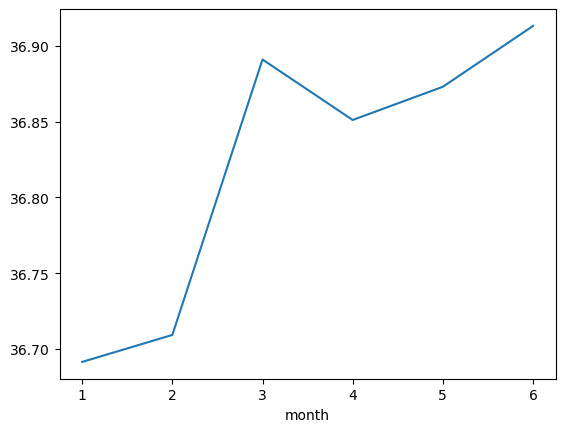

In [9]:
df.groupby("month")["price"].agg("mean").plot()

<AxesSubplot:xlabel='day'>

<Figure size 3000x2500 with 0 Axes>

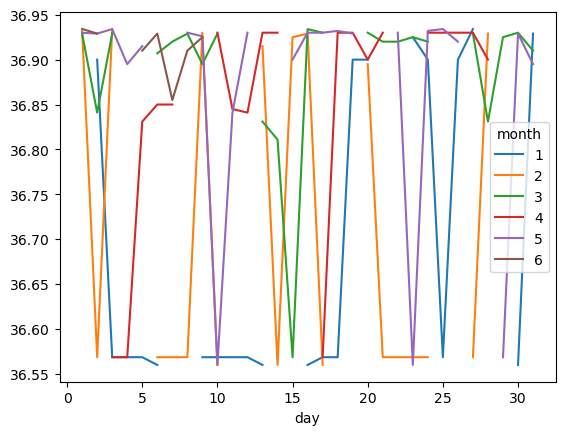

In [10]:
pivot = pd.pivot_table(df, values="price", index="day", columns="month")
plt.figure(figsize=(30, 25))
pivot.plot()

<AxesSubplot:xlabel='dayofweek'>

<Figure size 3000x2500 with 0 Axes>

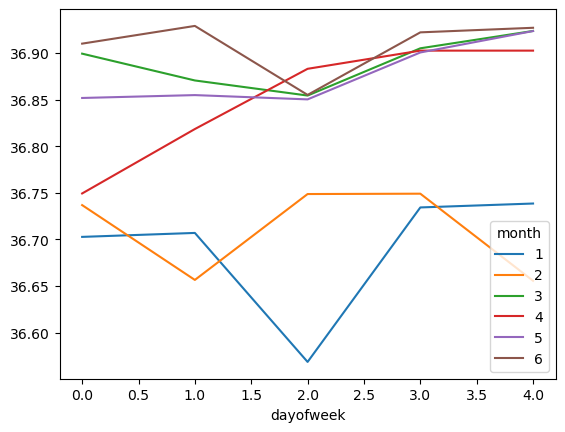

In [11]:
pivot2 = pd.pivot_table(df, values="price", index="dayofweek", columns="month")
plt.figure(figsize=(30, 25))
pivot2.plot()

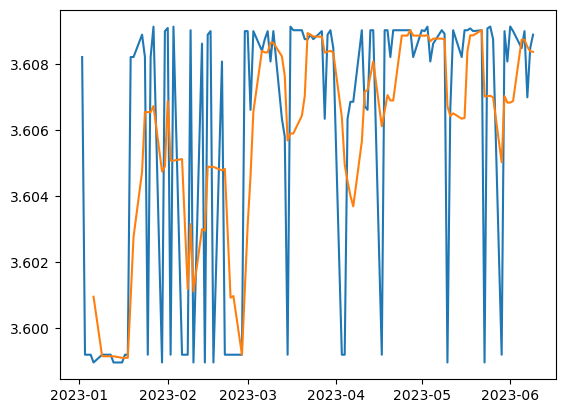

In [12]:
plt.plot(df.index, df["pricelog"])
plt.plot(df.index, df["pricelog"].rolling(5).mean())
plt.show()

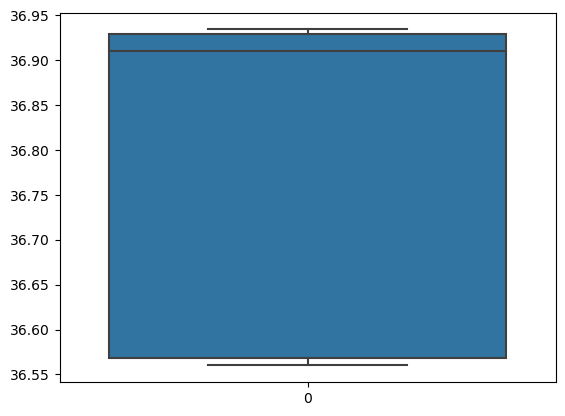

In [13]:
sns.boxplot(df["price"])
plt.show()

In [14]:
df

,date,price,open,high,low,pricelog,year,month,day,dayofweek
date,,,,,,,,,,
2023-01-02,2023-01-02,36.9000,36.9170,36.9171,36.745,3.608212,2023,1,2,0
2023-01-03,2023-01-03,36.5686,36.7450,36.9171,36.745,3.599190,2023,1,3,1
2023-01-04,2023-01-04,36.5686,36.7450,36.7522,36.745,3.599190,2023,1,4,2
2023-01-05,2023-01-05,36.5686,36.7450,36.7514,36.745,3.599190,2023,1,5,3
2023-01-06,2023-01-06,36.5600,36.7522,36.7522,36.745,3.598955,2023,1,6,4
...,...,...,...,...,...,...,...,...,...,...
2023-06-05,2023-06-05,36.9100,36.9221,36.9342,36.745,3.608483,2023,6,5,0
2023-06-06,2023-06-06,36.9290,36.7450,36.9345,36.745,3.608997,2023,6,6,1
2023-06-07,2023-06-07,36.8550,36.7450,36.9366,36.745,3.606991,2023,6,7,2


In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def get_info(data):
    outliers = outs(data)
    adful = adfuller(data)
    adful = {"test stat": adful[0], "p-value": adful[1], "crit values": adful[4]}
    decompose = seasonal_decompose(data, period=5, model="additive")
    fig, axs = plt.subplot_mosaic([
        ["hist", "hist"],
        ["acf", "pacf"]
    ])
    fig.set_size_inches(20, 10)
    axs["hist"].hist(data)
    plot_acf(data, ax=axs["acf"])
    plot_pacf(data, ax=axs["pacf"])
    plt.show()
    print("============================================")
    decompose.plot()
    return outliers, adful

def outs(data):
    c = 0 
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    l = q1 - IQR*1.5
    h = q3 + IQR*1.5
    for i in data:
        if i < l or i > h:
            c+=1
    return {"n_outs": c, "lowest": l, "highest": h}

F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


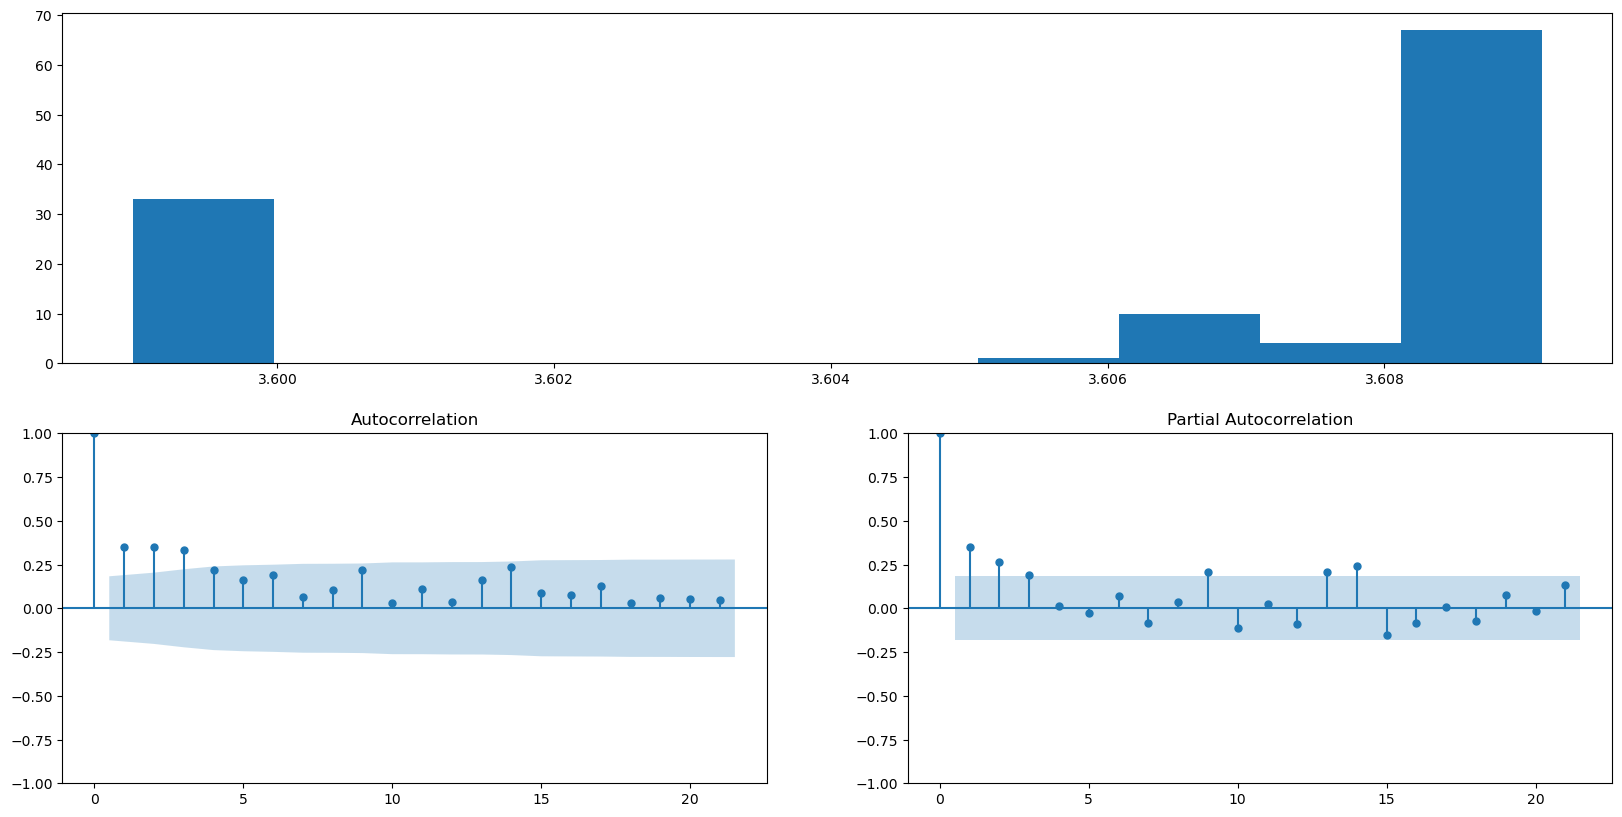

{'n_outs': 0, 'lowest': 3.584458837378048, 'highest': 3.6237418008580993}
{'test stat': -3.5005769691907336, 'p-value': 0.007972288628626823, 'crit values': {'1%': -3.4901313156261384, '5%': -2.8877122815688776, '10%': -2.5807296460459184}}


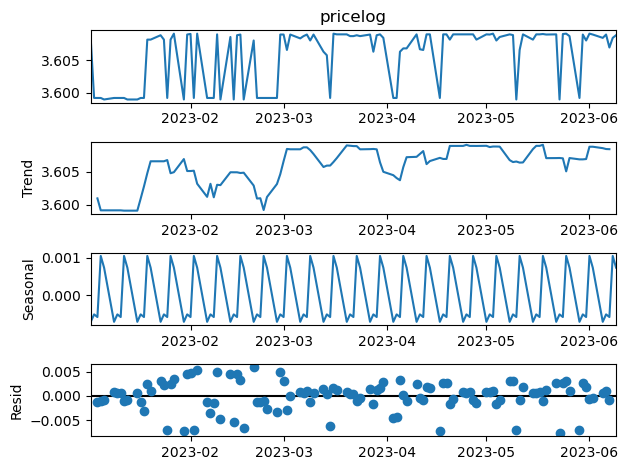

In [16]:
for i in get_info(df["pricelog"]):
    print(i)
    print("=================================================")

In [17]:
seas_an = df.copy()
seas_an.reset_index(drop=True, inplace=True)
seas_an.drop(df[["open", "high", "low", "year"]], axis=1, inplace=True)
time = np.arange(1, len(seas_an)+1)
seas_an["time"] = time
seas_an["time_squared"] = seas_an["time"]**2

In [18]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
days = OHE.fit_transform(seas_an[["dayofweek"]]).toarray()
days = pd.DataFrame(days)
days.columns = OHE.get_feature_names_out()
seas_an = pd.concat([seas_an, days], axis=1)

In [19]:
seas_an.columns[6:-1]

Index(['time', 'time_squared', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2',
       'dayofweek_3'],
      dtype='object')

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score

def fit_ols(data, cols_X, cols_y):
    X = data[cols_X]
    X = sm.add_constant(X)
    y = data[cols_y]
    model = sm.OLS(exog=X, endog=y)
    fit = model.fit()
    return fit

def get_preds(fit, data, cols_X, cols_y):
    X = data[cols_X]
    X = sm.add_constant(X)
    y = data[cols_y]
    preds = fit.predict(X)
    metrics = {"RMSE": np.sqrt(mse(y, preds)), 
               "MAE": mae(y, preds), 
               "MAPE": mape(y, preds),
               "R2": r2_score(y, preds)
              }
    return preds, metrics

In [21]:
from statsmodels.regression.linear_model import OLS
train = seas_an.loc[:82, :]
test = seas_an.loc[83:, :]
fit1_vars = ["time", "time_squared"]
fit2_vars = list(seas_an.columns[6:-1])
y = "price"
y2 = "pricelog"

fit1 = fit_ols(train, fit1_vars, y)
fit1_2 = fit_ols(train, fit1_vars, y2)
fit2 = fit_ols(train, fit2_vars, y)
fit2_2 = fit_ols(train, fit2_vars, y2)

In [22]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.08e-05
Time:                        22:09:34   Log-Likelihood:                 42.471
No. Observations:                  83   AIC:                            -78.94
Df Residuals:                      80   BIC:                            -71.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.6094      0.050    734.399      0.000      36.510      36.709
time             0.0058      0.003      2.134      0.036       0.000       0.011
time_squared -3.025e-05   3.16e-05     -0.958      0.341   -9.31e-05    3.26e-05
==============================================================================
Omnibus:                        5.910   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.515
Skew:                          -0.311   Prob(JB):                        0.172
Kurtosis:                       2.207   Cond. No.                     9.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
fit1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pricelog   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     12.38
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.07e-05
Time:                        22:09:34   Log-Likelihood:                 341.60
No. Observations:                  83   AIC:                            -677.2
Df Residuals:                      80   BIC:                            -669.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.6003      0.001   2653.801      0.000       3.598       3.603
time             0.0002   7.45e-05      2.135      0.036    1.08e-05       0.000
time_squared -8.236e-07    8.6e-07     -0.958      0.341   -2.53e-06    8.88e-07
==============================================================================
Omnibus:                        5.894   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                3.513
Skew:                          -0.312   Prob(JB):                        0.173
Kurtosis:                       2.208   Cond. No.                     9.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.364
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           0.000772
Time:                        22:09:34   Log-Likelihood:                 43.574
No. Observations:                  83   AIC:                            -73.15
Df Residuals:                      76   BIC:                            -56.22
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.6322      0.062    593.568      0.000      36.509      36.755
time             0.0056      0.003      2.018      0.047    7.43e-05       0.011
time_squared -2.738e-05   3.21e-05     -0.854      0.396   -9.12e-05    3.65e-05
dayofweek_0     -0.0317      0.052     -0.608      0.545      -0.136       0.072
dayofweek_1     -0.0432      0.052     -0.829      0.410      -0.147       0.061
dayofweek_2     -0.0373      0.052     -0.715      0.477      -0.141       0.067
dayofweek_3      0.0179      0.053      0.339      0.736      -0.087       0.123
==============================================================================
Omnibus:                        5.257   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.078
Skew:                          -0.265   Prob(JB):                        0.215
Kurtosis:                       2.220   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
fit2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pricelog   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.366
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           0.000770
Time:                        22:09:34   Log-Likelihood:                 342.70
No. Observations:                  83   AIC:                            -671.4
Df Residuals:                      76   BIC:                            -654.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.6009      0.002   2143.926      0.000       3.598       3.604
time             0.0002   7.56e-05      2.019      0.047    2.07e-06       0.000
time_squared -7.453e-07   8.72e-07     -0.854      0.396   -2.48e-06    9.92e-07
dayofweek_0     -0.0009      0.001     -0.608      0.545      -0.004       0.002
dayofweek_1     -0.0012      0.001     -0.827      0.411      -0.004       0.002
dayofweek_2     -0.0010      0.001     -0.715      0.477      -0.004       0.002
dayofweek_3      0.0005      0.001      0.340      0.735      -0.002       0.003
==============================================================================
Omnibus:                        5.243   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.076
Skew:                          -0.265   Prob(JB):                        0.215
Kurtosis:                       2.220   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
train = df.loc["2023-01-02":"2023-05-28", :]
test = df.loc["2023-05-29":, :]

In [27]:
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse, r2_score

def get_metrics(preds, y_true):
    return {
        "RMSE": np.sqrt(mse(y_true, preds)),
        "MAPE": mape(y_true, preds),
        "R2": r2_score(y_true, preds)
    }

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df["pricelog"], order=(3, 0, 0), seasonal_order=(4, 0, 0, 5))
fit = model.fit()

F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
F:\Anaconda\envs\cool_env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: 

In [29]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          pricelog   No. Observations:                  115
Model:             SARIMAX(3, 0, 0)x(4, 0, 0, 5)   Log Likelihood                 426.862
Date:                           Mon, 12 Jun 2023   AIC                           -837.724
Time:                                   22:09:35   BIC                           -815.765
Sample:                               01-02-2023   HQIC                          -828.811
                                    - 06-09-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0128      0.095      0.134      0.893      -0.174       0.200
ar.L2          0.1853      0.087      2.131      0.033       0.015       0.356
ar.L3          0.7974      0.092      8.624      0.000       0.616       0.979
ar.S.L5        0.1403      0.126      1.117      0.264      -0.106       0.387
ar.S.L10       0.0758      0.081      0.932      0.351      -0.084       0.235
ar.S.L15       0.4535      0.104      4.371      0.000       0.250       0.657
ar.S.L20       0.3188      0.109      2.926      0.003       0.105       0.532
sigma2       2.63e-05   4.13e-06      6.371      0.000    1.82e-05    3.44e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.38   Prob(JB):                         0.85
Heteroskedasticity (H):               0.85   Skew:                             0.08
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fit.resid)

1.0048549452544413

In [31]:
def conf_interval95(data, exp=False):
    if exp:
        CI_min = np.exp(data.mean() - 1.96*(data.std()/np.sqrt(len(data))))
        CI_max = np.exp(data.mean() + 1.96*(data.std()/np.sqrt(len(data))))
    else:
        CI_min = data.mean() - 1.96*(data.std()/np.sqrt(len(data)))
        CI_max = data.mean() + 1.96*(data.std()/np.sqrt(len(data)))
    return {"CI_min": CI_min, "CI_max": CI_max}

{'RMSE': 0.17601089024732583, 'MAPE': 0.003223488871494711, 'R2': -1.7719346466329053}
{'CI_min': 36.79141070645376, 'CI_max': 36.95416259120006}


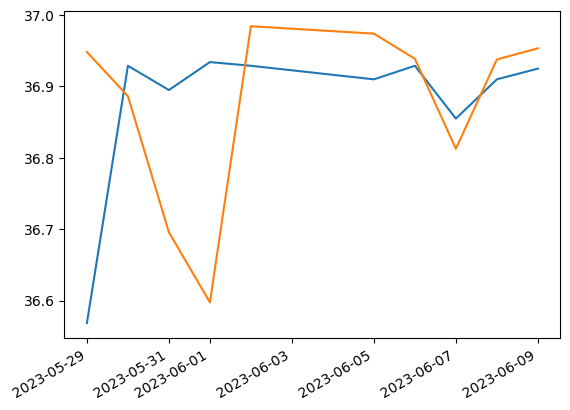

In [32]:
preds = fit.predict(test.index[0], test.index[-1])

conf95 = conf_interval95(preds, exp=True)

plt.plot(test.index, np.exp(test["pricelog"]))
np.exp(preds).plot()
print(get_metrics(np.exp(preds), np.exp(test["pricelog"])))
print(conf95)

In [33]:
preds2 = fit.get_forecast(steps=20)

<AxesSubplot:xlabel='date'>

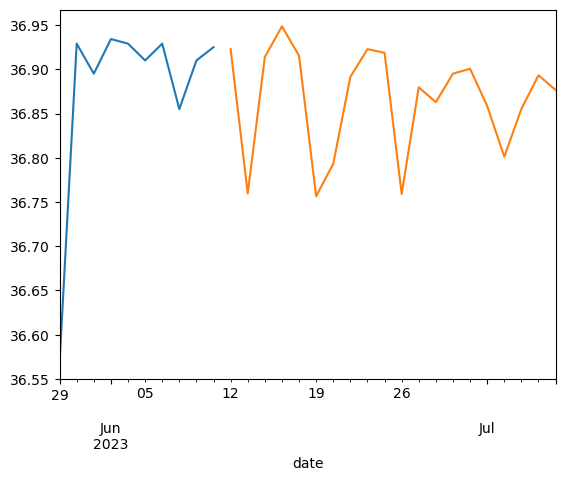

In [34]:
np.exp(test["pricelog"]).plot()
np.exp(preds2.predicted_mean).plot()

In [35]:
np.exp(preds2.predicted_mean)

2023-06-12    36.922739
2023-06-13    36.759521
2023-06-14    36.913820
2023-06-15    36.948593
2023-06-16    36.915269
2023-06-19    36.756370
2023-06-20    36.793227
2023-06-21    36.891367
2023-06-22    36.922791
2023-06-23    36.918699
2023-06-26    36.759037
2023-06-27    36.879654
2023-06-28    36.862817
2023-06-29    36.895069
2023-06-30    36.900604
2023-07-03    36.858465
2023-07-04    36.801150
2023-07-05    36.855184
2023-07-06    36.893245
2023-07-07    36.876587
Freq: B, Name: predicted_mean, dtype: float64

In [36]:
conf = np.exp(preds2.conf_int())

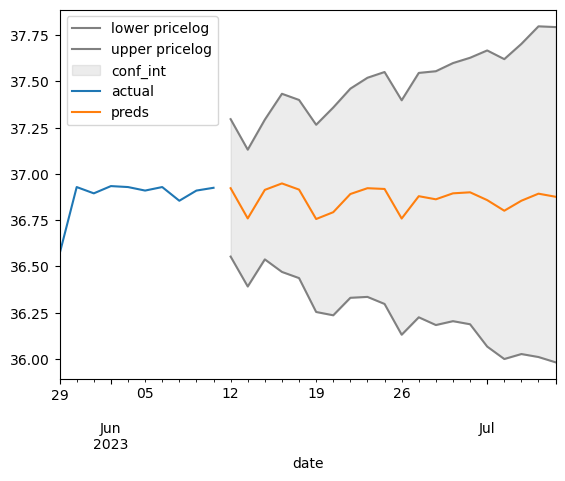

In [37]:
conf.plot(color="gray")
plt.fill_between(conf.index, conf["lower pricelog"], conf["upper pricelog"], alpha=0.15, color="gray", label="conf_int")
np.exp(test["pricelog"]).plot(label="actual")
np.exp(preds2.predicted_mean).plot(label="preds")
plt.legend()
plt.show()

In [38]:
import pickle

with open("sarima(3,0,0)(4,0,0,5).pkl", "wb") as model:
    pickle.dump(fit, model)
